In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))
from tools import merge_matrix, hic_norm

In [2]:
analyse_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/'
length = 100

In [3]:
def statistic_info(cell_line):
    all_hr_y = np.zeros((22, length))
    all_result_y = np.zeros((22, length))
    for chr in range(1, 23):
        print(chr)
        chr_file_name = 'chr{}_1000b.npz'.format(chr)
        hr_path = os.path.join(analyse_path, cell_line, 'use_data', 'hr', chr_file_name)
        result_path = os.path.join(analyse_path, cell_line, 'validation', chr_file_name)

        hr = np.load(hr_path)['hic']
        result = np.load(result_path)['out']

        hr = hic_norm(hr)
        result[result>255] = 255

        hr = hr.astype(np.uint8)
        result = result.astype(np.uint8)

        hr = merge_matrix(hr)
        result = merge_matrix(result)

        hr_y = np.zeros(length)
        result_y = np.zeros(length)
        for i in range(length):
            hr_diagonal = hr.diagonal(offset=i)
            hr_y[i] = hr_diagonal.sum() / hr_diagonal.shape[0]
            result_diagonal = result.diagonal(offset=i)
            result_y[i] = result_diagonal.sum() / result_diagonal.shape[0]

        all_hr_y[chr-1] = hr_y
        all_result_y[chr-1] = result_y
    return all_hr_y, all_result_y

def show(cell_line, all_hr_y, all_result_y):
    sns.set_style("whitegrid") 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
    axes.grid(False)
    axes.plot(list(range(length)), all_hr_y.mean(axis=0), color=(166/255, 206/255, 227/255), label='hr')
    axes.plot(list(range(length)), all_result_y.mean(axis=0), color=(51/255, 160/255, 44/255), label='mine')

    # plt.ylim(0, 1)
    plt.xlabel('Genomic distance(1kb)')
    plt.ylabel('IF')
    plt.xlim(0, length)
    plt.legend()
    plt.savefig('IntersectionLocation_{}.pdf'.format(cell_line))
    plt.show()

def calculate_intersection_location(all_hr_y, all_result_y, is_all=True):
    hr_y_mean, result_y_mean = all_hr_y, all_result_y
    if is_all:
        hr_y_mean = all_hr_y.mean(axis=0)
        result_y_mean = all_result_y.mean(axis=0)
    for i in range(length):
        for j in range(5):
            if result_y_mean[i+j] > hr_y_mean[i+j]:
                break
        if j == 4:
            print('交叉点: {}'.format(i))
            return i

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


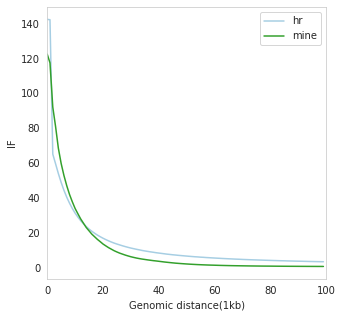

交叉点: 14


14

In [4]:
# a
cell_line = 'GM12878_ATAC_H3K27ac_H3K4me3'

GM12878_all_hr_y, GM12878_all_result_y = statistic_info(cell_line)
show(cell_line, GM12878_all_hr_y, GM12878_all_result_y)
calculate_intersection_location(GM12878_all_hr_y, GM12878_all_result_y)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


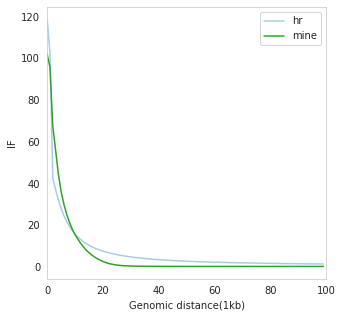

交叉点: 10


10

In [5]:
# b
cell_line = 'IMR90_ATAC_H3K27ac_H3K4me3'

IMR90_all_hr_y, IMR90_all_result_y = statistic_info(cell_line)
show(cell_line, IMR90_all_hr_y, IMR90_all_result_y)
calculate_intersection_location(IMR90_all_hr_y, IMR90_all_result_y)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


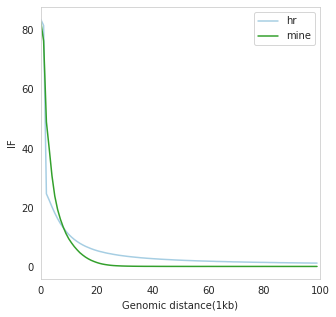

交叉点: 9


9

In [6]:
# c
cell_line = 'K562_ATAC_H3K27ac_H3K4me3'

K562_all_hr_y, K562_all_result_y = statistic_info(cell_line)
show(cell_line, K562_all_hr_y, K562_all_result_y)
calculate_intersection_location(K562_all_hr_y, K562_all_result_y)

交叉点: 18
交叉点: 15
交叉点: 15
交叉点: 14
交叉点: 15
交叉点: 14
交叉点: 14
交叉点: 14
交叉点: 12
交叉点: 16
交叉点: 14
交叉点: 11
交叉点: 14
交叉点: 14
交叉点: 18
交叉点: 14
交叉点: 16
交叉点: 8
交叉点: 4
交叉点: 15
交叉点: 16
交叉点: 25
交叉点: 13
交叉点: 10
交叉点: 10
交叉点: 8
交叉点: 9
交叉点: 10
交叉点: 9
交叉点: 10
交叉点: 12
交叉点: 10
交叉点: 9
交叉点: 10
交叉点: 8
交叉点: 11
交叉点: 13
交叉点: 12
交叉点: 12
交叉点: 7
交叉点: 12
交叉点: 9
交叉点: 10
交叉点: 15
交叉点: 12
交叉点: 8
交叉点: 7
交叉点: 6
交叉点: 7
交叉点: 8
交叉点: 9
交叉点: 7
交叉点: 6
交叉点: 8
交叉点: 8
交叉点: 7
交叉点: 6
交叉点: 7
交叉点: 11
交叉点: 13
交叉点: 10
交叉点: 6
交叉点: 15
交叉点: 9
交叉点: 9
交叉点: 18


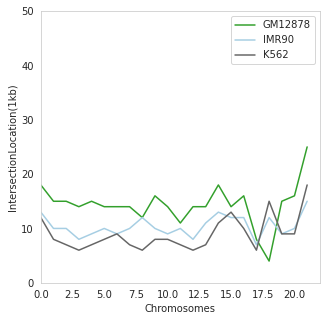

In [7]:
# d
GM12878 = [calculate_intersection_location(GM12878_all_hr_y[i], GM12878_all_result_y[i], is_all=False) for i in range(22)]
IMR90 = [calculate_intersection_location(IMR90_all_hr_y[i], IMR90_all_result_y[i], is_all=False) for i in range(22)]
K562 = [calculate_intersection_location(K562_all_hr_y[i], K562_all_result_y[i], is_all=False) for i in range(22)]

x = list(range(22))

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)

axes.plot(x, GM12878, color=(51/255, 160/255, 44/255), label='GM12878')
axes.plot(x, IMR90, color=(166/255, 206/255, 227/255), label='IMR90')
axes.plot(x, K562, color=(102/255, 102/255, 102/255), label='K562')

plt.ylim(0, 50)
plt.xlabel('Chromosomes')
plt.ylabel('IntersectionLocation(1kb)')
plt.xlim(0, len(x))
plt.legend()
plt.savefig('IntersectionLocation_1.pdf')
plt.show()

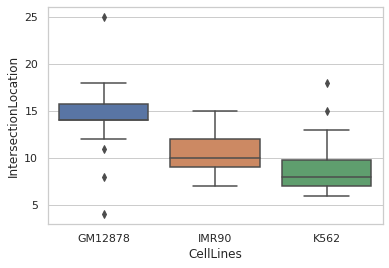

In [8]:
# e
import pandas as pd

GM12878_new = [['GM12878', GM12878[i]] for i in range(len(GM12878))]
IMR90_new = [['IMR90', IMR90[i]] for i in range(len(IMR90))]
K562_new = [['K562', K562[i]] for i in range(len(K562))]

GM12878_df = pd.DataFrame(GM12878_new, columns=['CellLines', 'IntersectionLocation'])
IMR90_df = pd.DataFrame(IMR90_new, columns=['CellLines', 'IntersectionLocation'])
K562_df = pd.DataFrame(K562_new, columns=['CellLines', 'IntersectionLocation'])
df = pd.concat([GM12878_df, IMR90_df, K562_df])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="CellLines", y="IntersectionLocation", data=df)
fig = ax.get_figure()
fig.savefig('IntersectionLocation_2.pdf')

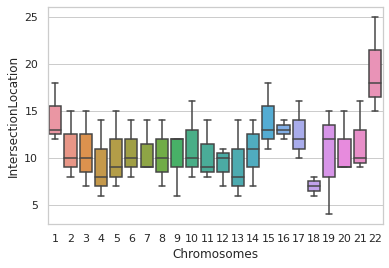

In [9]:
# f
import pandas as pd

_list = []
for i in range(22):
    _list.append([i+1, GM12878[i]])
    _list.append([i+1, IMR90[i]])
    _list.append([i+1, K562[i]])
df = pd.DataFrame(_list, columns=['Chromosomes', 'IntersectionLocation'])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Chromosomes", y="IntersectionLocation", data=df)
fig = ax.get_figure()
fig.savefig('IntersectionLocation_3.pdf')

In [10]:
GM12878

[18,
 15,
 15,
 14,
 15,
 14,
 14,
 14,
 12,
 16,
 14,
 11,
 14,
 14,
 18,
 14,
 16,
 8,
 4,
 15,
 16,
 25]